<b> Модель нейронной сети на базе данных MNIST</b>

In [ ]:
from tensorflow.keras.datasets import mnist # database MNIST
from tensorflow.keras.models  import Sequential # Последовательная модель
from tensorflow.keras.layers import Dense # Полносвязные слои
from tensorflow.keras import utils # Для преобразования выходных данных
from tensorflow.keras.preprocessing import image # работа с изображениями
from google.colab import files #для загрузки на юпетер ноутбук/ с юпитер ноутбука
from PIL import Image # Для работы с изображениями
import numpy as np
import matplotlib.pyplot as plt



<b>Подгрузка и преобразование набора данных</b>

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() # подгружаем датасет

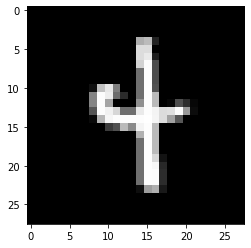

In [ ]:
n = 5324 
img = Image.fromarray(x_train_org[n], mode = 'P') # Из массива np создаем картинку и интепретируем ее
plt.imshow(img)
plt.show()

In [ ]:
y_train_org[n]

4

In [ ]:
x_train = x_train_org.reshape(60000, 784) # меняем размерность 60000 цифр, каждая из 784 значений (28x28 пикселей изображения)
x_test = x_test_org.reshape(10000, 784)

In [ ]:
x_train = x_train.astype('float32') # меняем тип значений
x_train = x_train / 255 # нормируем их в значения от 0 до 1, так как ранее массив содержал значения от 0 до 255, где  0 -идеально черный пиксель, 255 -идеально белый

In [ ]:
print(y_train_org[n])

In [ ]:
y_train = utils.to_categorical(y_train_org, 10) # создаем новый тип данных, категориальный, где у нас будет 10 значений, и порядковый номер соотвествует цифре
# так как у нас будет 10 выходных нейронов, нам будет это выгодно

In [ ]:
print(y_train[n])

<b> Построение нейронки</b>

In [ ]:
model = Sequential() # Создание последовательной модели

In [ ]:
model.add(Dense(800, input_dim=784, activation='relu')) #создание скрытого полносвязного слоя с 800 нейронами, 784 входных значений на каждый нейрон, и функцией активации relu
model.add(Dense(10, activation='softmax')) # создание выходного слоя нейронов, с 10 нейронами, и функцией активации - 'softmax'
#Внимание вопрос на понимание, если модель у нас полносвязная (каждый нейрон текущего слоя, имеет связь с каждым нейроном прошлого слоя),
#то сколько входных значений у нас на выходном слое?   
#Ответ: 800

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #optimizer - процедура обучения, loss - функция, которую мы отпимизируем
#metrics - параметр, по которому будем отслеживать наше обучение



In [ ]:
print(model.summary()) # любуемся нашей моделью и смотрим сколько у нее будет параметров (весов)

In [ ]:
model.fit(x_train, y_train, batch_size=200, epochs=25, validation_split = 0.2, verbose=1)#обучение модели

Epoch 1/25
240/240 [==============================] - 2s 6ms/step - loss: 0.3089 - accuracy: 0.9143 - val_loss: 0.1667 - val_accuracy: 0.9508
Epoch 2/25
240/240 [==============================] - 1s 5ms/step - loss: 0.1279 - accuracy: 0.9625 - val_loss: 0.1172 - val_accuracy: 0.9671
Epoch 3/25
240/240 [==============================] - 1s 5ms/step - loss: 0.0827 - accuracy: 0.9764 - val_loss: 0.0979 - val_accuracy: 0.9709
Epoch 4/25
240/240 [==============================] - 1s 5ms/step - loss: 0.0591 - accuracy: 0.9831 - val_loss: 0.0845 - val_accuracy: 0.9747
Epoch 5/25
240/240 [==============================] - 1s 5ms/step - loss: 0.0422 - accuracy: 0.9885 - val_loss: 0.0767 - val_accuracy: 0.9771
Epoch 6/25
240/240 [==============================] - 1s 5ms/step - loss: 0.0320 - accuracy: 0.9917 - val_loss: 0.0733 - val_accuracy: 0.9772
Epoch 7/25
240/240 [==============================] - 1s 5ms/step - loss: 0.0230 - accuracy: 0.9942 - val_loss: 0.0771 - val_accuracy: 0.9772
Epoch 

<b> Сохранение модели на компьютер</b>

In [ ]:
model.save("MNIST_Sequential_dense.h5") #сохранение модели на сервер гугла

In [ ]:
!ls # Из линукса

In [ ]:
files.download('MNIST_Sequential_dense.h5') # загрузка сохраненного файла с сервера гугла

<b>Чтобы использовать на своем компьютере</b><br>
from keras.models import load_model<br>
model=load_model('MNIST_Sequential_dense.h5')<br>

In [ ]:
n_new = 1112
y_test_org[1112]

4

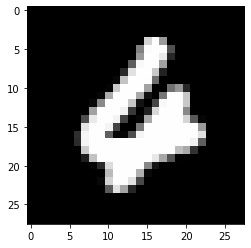

In [ ]:
img = Image.fromarray(x_test_org[n_new], mode='P') #проверка одного значения из тестового слоя (на занятии мы нашли что на 1112 значении модель ошибается, хотя точность была 98 процентов)
plt.imshow(img)
plt.show()

In [ ]:
x = x_test[n_new]
x = np.expand_dims(x, axis=0)
x

In [ ]:
prediction = model.predict(x) #предсказываем число
prediction

array([[8.05156120e-08, 3.03037452e-18, 1.02839515e-07, 4.54903643e-10,
        3.89640220e-04, 6.49916590e-13, 9.99610245e-01, 3.26032062e-14,
        2.63362958e-17, 7.55215965e-17]], dtype=float32)

In [ ]:
files.upload() #рисуем сами ПРИМЕРНО КВАДРАТНЫЙ(смотрите занятие почему) рисунок, и погружаем его сюда

Saving 6.png to 6.png


{'6.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xed\x00\x00\x02\xd4\x08\x02\x00\x00\x000\xa9\x9bU\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x12t\x00\x00\x12t\x01\xdef\x1fx\x00\x00N\xc6IDATx^\xed\xdd\xdb\xc2#!nh\xe1d\xbf\xff;g\xd3\x8d\xa7\x86\x16 \xc4\xb1\xa0X\xdfE\xe6\xb7\xcd\xb9@\xc8\xeeI\xf2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\x1b\xff\xfb\xfbO\x00\x17\xfb\xbf\xff\xfb\xbf\xdf_\x1b\xfb\xdf\xff%^\x01\x90\x88\x0b\xc0\xd5\x8e\xc8`\x04\x12\x1a\x00\x0f\xc2\x01p$K\xfe\xa1\xdf\xf7\'f0\x02\t\r\x00\xa2\x00p\x98\x0f\xe4\x1fc\

In [ ]:
!ls

1.png  5.png  6.png  MNIST_Sequential_dense.h5	sample_data


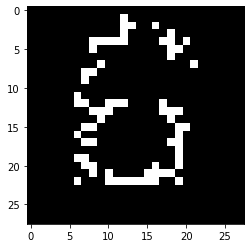

In [ ]:
img_path = '6.png' # подключаем рисунок, и конвертируем в расрешение 28x28 и отображаем результат
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
plt.imshow(img.convert('P'))
plt.show()

In [ ]:
x = image.img_to_array(img) # переводим картинку в численный массив
x = x.reshape(1, 784)
x /= 255

In [ ]:
prediction = model.predict(x) #предсказываем наше изображение (смотрите на самое больше значение из списка)
prediction

array([[8.05156120e-08, 3.03037452e-18, 1.02839515e-07, 4.54903643e-10,
        3.89640220e-04, 6.49916590e-13, 9.99610245e-01, 3.26032062e-14,
        2.63362958e-17, 7.55215965e-17]], dtype=float32)

In [ ]:
x_test = x_test.astype('float32') #нормируем тестовый набор данных по тому же принципу что и тренировочный
x_test = x_test / 255
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1) #смотрим какая точность у нас на тестовом наборе данных

313/313 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9828


In [ ]:
scores

[0.07096284627914429, 0.9828000068664551]

In [ ]:
print('Доля верных ответов на тестовых данных:', round(scores[1] * 100, 4)) #печатаем ответ

Доля верных ответов на тестовых данных: 98.28


In [ ]:
import math
import matplotlib.pyplot as plt

def compute_population(t):
   #вычислить численность населения для года t по формуле
    rezult = 172/45 * (math.pi/2 - math.atan((2000-t)/45))
    return rezult
a = int(input("Start\n"))
b = int(input("End\n"))
x = range(a, b+1)
y = []
for i in x:
    y.append(compute_population(i))
plt.plot(x,y,'-')
plt.show()

In [ ]:
from math import exp,cos,sin,log1p,pi
import matplotlib.pyplot as plt


def func(x):
  rezult = exp(cos(x)) + log1p(sin(0.8*x)**2 + 1) * cos(x)
  return  rezult

def y_f(x):
  rezult = -log1p((cos(x) + sin(x))**2 +1.7) + 2
  return rezult

x = [i*pi/180 for i in range(-240,361,1)]
fx = []
yx = []
for i in x:
  fx.append(func(i))
  yx.append(y_f(i))
line_func = plt.plot(x,fx)
line_y_f = plt.plot(x,yx)

plt.setp(line_func,color = "blue", linewidth = 2)
plt.setp(line_y_f, color = "red", linewidth = 2)

plt.show()

In [ ]:
from matplotlib.patches import Circle, Wedge, Ellipse, Arc, Rectangle

#figure = wedge((4, 4), 2, -90, 90)

figure = Wedge((4, 4), 2, -90, 90)

figure = Rectangle((10, 12), 5, 8)

#figure = Wedge((4, 4), 2, -90)

figure = Arc((6, 6), 5, 3, 0, 200, 100)

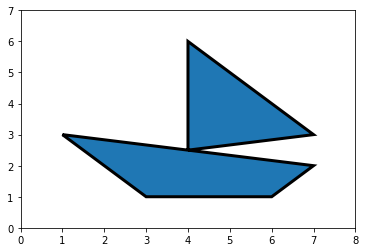

In [ ]:
from matplotlib.patches import Path, PathPatch
import matplotlib.pyplot as plt

n = 8 # размер области

m  = 7 # размер области

plt.xlim(0, n)

plt.ylim(0,m)

ax = plt.gca()

# создать массив точек
vertices = [(1, 3), (7, 2), (6, 1), (3, 1), (1, 3), (4, 2.5), (4,6), (7, 3), (4,2.5)]

#создать список кодов для последовательности рисования:
codes = [1,2,2,2,2,1,2,2,2] #список


#создать объект pyth
path = Path(vertices, codes)

#создать фигуру
path_patch = PathPatch(path, lw = 3)

# Добавить созданную фигуру в область ax:
#оператор 1
  ax.add_patch(path_patch)
plt.show()

In [ ]:
from math import atan, pi

def real(t):
  N = 172/45 * (pi/2 - atan((2000 - t)/45)
  return(N)

[1000, 1750, 1800, 1850, 1900, 1950, 1955, 
         1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 
         2000, 2005, 2010, 2011, 2012, 2013, 2014, 2015,
         2016, 2017, 2018, 2019]

populalion =[0.400,0.791,1.000,1.262,1.650,2.519,
             2.756,3.021,3.335,3.692,4.068,4.435,4.831,
             5.264,5.674,6.071,6.344,6.933, 7.015,7.100,
             7.162,7.271,7.358,7.444,7.530,7.669,7.763]  

In [ ]:
from math import exp,sqrt,pi, e
x_cr = 5.3526 # X_среднее
x = [0.78, 2.28, 3.78, 5.28, 6.78, 8.28, 9.78, 11.04]
#x_cr = 4.8
#x =  [0.73, 2.01,3.29, 4.57, 5.85, 7.13, 8.41, 9.69]
#S = 2.17
S = 2.31
A = 1 / (S * sqrt(2 * pi))
B = 2 * S**2
print("A=",round(A,4))
print("B=",round(B,4))
for i in x:
  first = i - x_cr
  second = first**2
  third = second / B
  fourth = exp(-third)
  fifth = A * fourth
  print("x=", i, "first = ",round(first,4), "second =", round(second,4), "third = ", round(third,4), "fourth = ", round(fourth,4),"fifth=",round(fifth,4) )

tochka_1 = (x_cr + S)

tochka_2 = (x_cr - S)

const = A/sqrt(e)

print("Первая точка : [",round(tochka_1,4),";",round(const,4),"]")
print("Вторая точка : [",round(tochka_2,4),";",round(const,4),"]")

<p>180


In [ ]:
x = [156, 160, 164, 168, 172, 176, 180]
n = [10, 14, 26, 28, 12, 8, 2]
x_cr = 166
sum = 0
i=0
while i < len(x):
  sum += (x[i]-x_cr)**2 * n[i]
  print((x[i]-x_cr)**2 * n[i] )
  i += 1
print(sum / 100)


1000
504
104
112
432
800
392
33.44
